<a href="https://colab.research.google.com/github/garunAMT/CMTFE-Assignments/blob/main/CMTFE_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part A**


In [15]:
import numpy as np
import pandas as pd

# Parameters
nx = 40  # Number of grid points in the x-direction
ny = 40  # Number of grid points in the y-direction
L = 1.0  # Length of the square domain
T_L = 1.0  # Left boundary temperature
T_R = 1.0  # Right boundary temperature
T_T = 1.0  # Top boundary temperature
T_B = 1.0  # Bottom boundary temperature

dx = L / (nx - 1)
dy = L / (ny - 1)
alpha = 1.0

# Initialize temperature field
T = np.zeros((nx, ny))

# Boundary conditions
T[:, 0] = T_L
T[:, -1] = T_R
T[0, :] = T_B
T[-1, :] = T_T

# Coefficient arrays
aw = np.zeros(nx)
ap = np.zeros(nx)
ae = np.zeros(nx)
b = np.zeros(nx)

# TDMA arrays
P = np.zeros(nx)
Q = np.zeros(nx)

# TDMA implementation along a row (e.g., midline)
j = ny // 2  # Mid-line

for i in range(1, nx - 1):
    aw[i] = alpha / dx**2
    ae[i] = alpha / dx**2
    ap[i] = aw[i] + ae[i] + 2 * alpha / dy**2
    b[i] = (T[i, j-1] + T[i, j+1]) * alpha / dy**2

# Forward elimination
for i in range(1, nx - 1):
    P[i] = ae[i] / (ap[i] - aw[i] * P[i - 1])
    Q[i] = (aw[i] * Q[i - 1] + b[i]) / (ap[i] - aw[i] * P[i - 1])

# Backward substitution
for i in range(nx - 2, 0, -1):
    T[i, j] = P[i] * T[i + 1, j] + Q[i]

# Prepare the results for midline temperatures
indices_i = np.full(ny, nx // 2)  # i is constant at the midline
indices_j = np.arange(1, ny + 1)
midline_temperatures = T[:, j]

# Analytical solution along the midline
y = np.linspace(0, L, ny)
T_analytical = np.zeros_like(y)
for n in range(1, 100):
    T_analytical += (1 - (-1)**n) / (n * np.sinh(n * np.pi * L)) * np.sin(n * np.pi * y) * np.sinh(n * np.pi * L / 2)
T_analytical *= (200 / np.pi)

# Combine the results into a DataFrame
results_df = pd.DataFrame({
    "Index (i)": indices_i,
    "Index (j)": indices_j,
    "T_TDMA": midline_temperatures,
    "T_Analytical": T_analytical
})

results_df


,Index (i),Index (j),T_TDMA,T_Analytical
0,20,1,1.000000e+00,0.000000e+00
1,20,2,1.712522e-22,2.136849e+00
2,20,3,6.850090e-22,4.254481e+00
3,20,4,2.568784e-21,6.334189e+00
4,20,5,9.590126e-21,8.358251e+00
5,20,6,3.579172e-20,1.031032e+01
6,20,7,1.335767e-19,1.217571e+01
7,20,8,4.985153e-19,1.394163e+01
8,20,9,1.860484e-18,1.559718e+01
9,20,10,6.943422e-18,1.713338e+01


# **Part B**

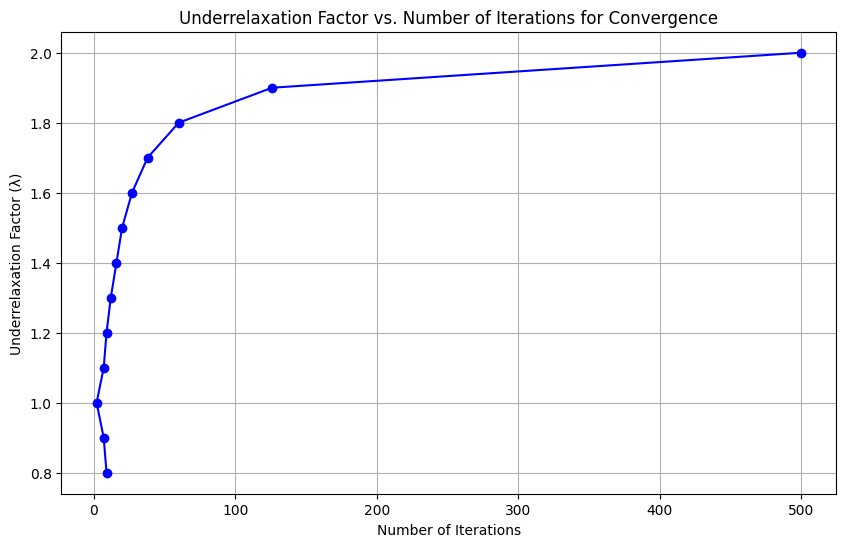

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
nx = 40  # Number of grid points in the x-direction
ny = 40  # Number of grid points in the y-direction
L = 1.0  # Length of the square domain
T_L = 1.0  # Left boundary temperature
T_R = 1.0  # Right boundary temperature
T_T = 1.0  # Top boundary temperature
T_B = 1.0  # Bottom boundary temperature

dx = L / (nx - 1)
dy = L / (ny - 1)
alpha = 1.0
max_iter = 500
tol = 1e-6

def run_tdmasolver(lam):
    # Initialize temperature field
    T = np.zeros((nx, ny))

    # Boundary conditions
    T[:, 0] = T_L
    T[:, -1] = T_R
    T[0, :] = T_B
    T[-1, :] = T_T

    # Coefficient arrays
    aw = np.zeros(nx)
    ap = np.zeros(nx)
    ae = np.zeros(nx)
    b = np.zeros(nx)

    # TDMA arrays
    P = np.zeros(nx)
    Q = np.zeros(nx)

    # Iterate until convergence
    for iteration in range(max_iter):
        T_old = T.copy()

        # TDMA implementation along a row (e.g., midline)
        j = ny // 2  # Mid-line

        for i in range(1, nx - 1):
            aw[i] = alpha / dx**2
            ae[i] = alpha / dx**2
            ap[i] = aw[i] + ae[i] + 2 * alpha / dy**2
            b[i] = (T[i, j-1] + T[i, j+1]) * alpha / dy**2

        # Forward elimination
        for i in range(1, nx - 1):
            P[i] = ae[i] / (ap[i] - aw[i] * P[i - 1])
            Q[i] = (aw[i] * Q[i - 1] + b[i]) / (ap[i] - aw[i] * P[i - 1])

        # Backward substitution
        for i in range(nx - 2, 0, -1):
            T[i, j] = P[i] * T[i + 1, j] + Q[i]

        # Under-relaxation
        T[:, j] = (1 - lam) * T_old[:, j] + lam * T[:, j]

        # Check convergence
        if np.linalg.norm(T - T_old, ord=np.inf) < tol:
            return iteration + 1  # Number of iterations

    return max_iter

# Define range of lambda values
lambda_values = np.arange(0.8, 2.1, 0.1)
iterations = []

# Run the TDMA solver for each lambda value
for lam in lambda_values:
    iter_count = run_tdmasolver(lam)
    iterations.append(iter_count)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(iterations, lambda_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Iterations')
plt.ylabel('Underrelaxation Factor (λ)')
plt.title('Underrelaxation Factor vs. Number of Iterations for Convergence')
plt.grid(True)
plt.show()


# **Part C**

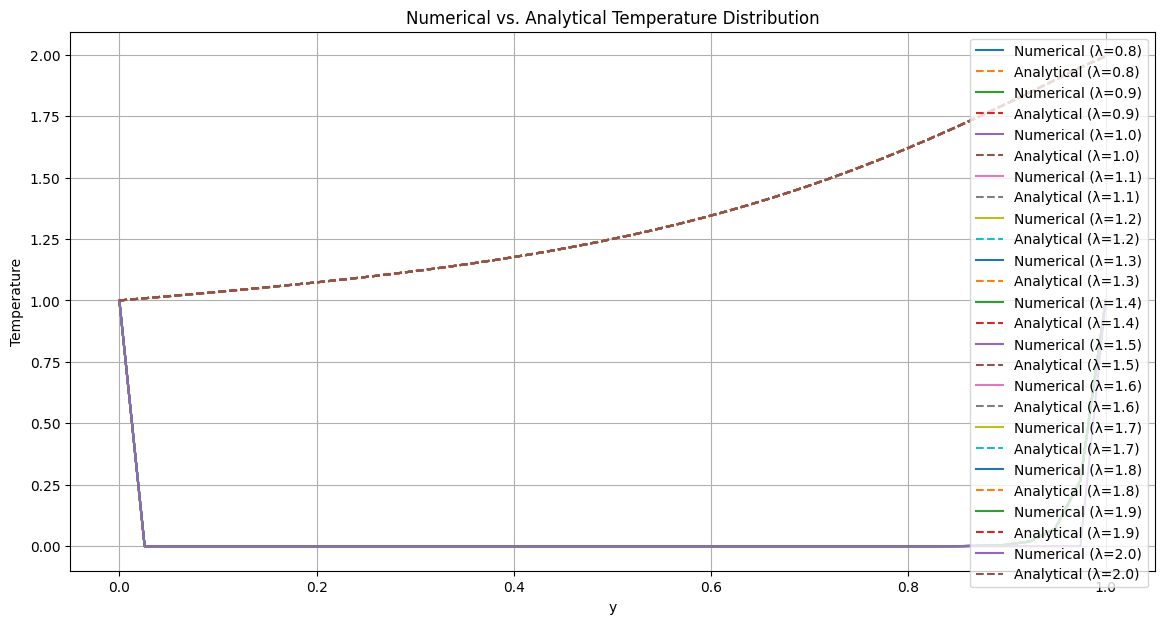

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
nx = 40
ny = 40
L = 1.0
T_L = 1.0
T_R = 1.0
T_T = 1.0
T_B = 1.0
max_n = 100

def analytical_solution(x, y, L, max_n):
    T_analytical = np.zeros_like(x)
    for n in range(1, max_n + 1):
        term = (1 - (-1)**n) / (n * np.sinh(n * np.pi * L)) * np.sin(n * np.pi * x) * np.sinh(n * np.pi * y / L)
        T_analytical += term
    T_analytical *= 2 / np.pi
    T_analytical += T_T
    return T_analytical

def run_tdmasolver(lam):
    # Initialize temperature field
    T = np.zeros((nx, ny))

    # Boundary conditions
    T[:, 0] = T_L
    T[:, -1] = T_R
    T[0, :] = T_B
    T[-1, :] = T_T

    # Coefficient arrays
    aw = np.zeros(nx)
    ap = np.zeros(nx)
    ae = np.zeros(nx)
    b = np.zeros(nx)

    # TDMA arrays
    P = np.zeros(nx)
    Q = np.zeros(nx)

    # Iterate until convergence
    for iteration in range(max_iter):
        T_old = T.copy()

        # TDMA implementation along a row (e.g., midline)
        j = ny // 2  # Mid-line

        for i in range(1, nx - 1):
            aw[i] = alpha / dx**2
            ae[i] = alpha / dx**2
            ap[i] = aw[i] + ae[i] + 2 * alpha / dy**2
            b[i] = (T[i, j-1] + T[i, j+1]) * alpha / dy**2

        # Forward elimination
        for i in range(1, nx - 1):
            P[i] = ae[i] / (ap[i] - aw[i] * P[i - 1])
            Q[i] = (aw[i] * Q[i - 1] + b[i]) / (ap[i] - aw[i] * P[i - 1])

        # Backward substitution
        for i in range(nx - 2, 0, -1):
            T[i, j] = P[i] * T[i + 1, j] + Q[i]

        # Under-relaxation
        T[:, j] = (1 - lam) * T_old[:, j] + lam * T[:, j]

        # Check convergence
        if np.linalg.norm(T - T_old, ord=np.inf) < tol:
            return T[:, j]  # Return temperature at midline

    return T[:, j]

# Define range of lambda values
lambda_values = np.arange(0.8, 2.1, 0.1)
midline_temperatures = []
analytical_temperatures = []

# Compute the analytical solution
y_mid = np.linspace(0, L, ny)
x_mid = np.full_like(y_mid, L / 2)
T_analytical_midline = analytical_solution(x_mid, y_mid, L, max_n)

# Run the TDMA solver for each lambda value
for lam in lambda_values:
    T_numerical_midline = run_tdmasolver(lam)
    midline_temperatures.append(T_numerical_midline)
    analytical_temperatures.append(T_analytical_midline)

# Convert lists to arrays for plotting
midline_temperatures = np.array(midline_temperatures)
analytical_temperatures = np.array(analytical_temperatures)

# Plotting
plt.figure(figsize=(14, 7))

# Plot numerical results vs. analytical results
for i, lam in enumerate(lambda_values):
    plt.plot(y_mid, midline_temperatures[i], label=f'Numerical (λ={lam:.1f})')
    plt.plot(y_mid, analytical_temperatures[i], '--', label=f'Analytical (λ={lam:.1f})')

plt.xlabel('y')
plt.ylabel('Temperature')
plt.title('Numerical vs. Analytical Temperature Distribution')
plt.legend()
plt.grid(True)
plt.show()


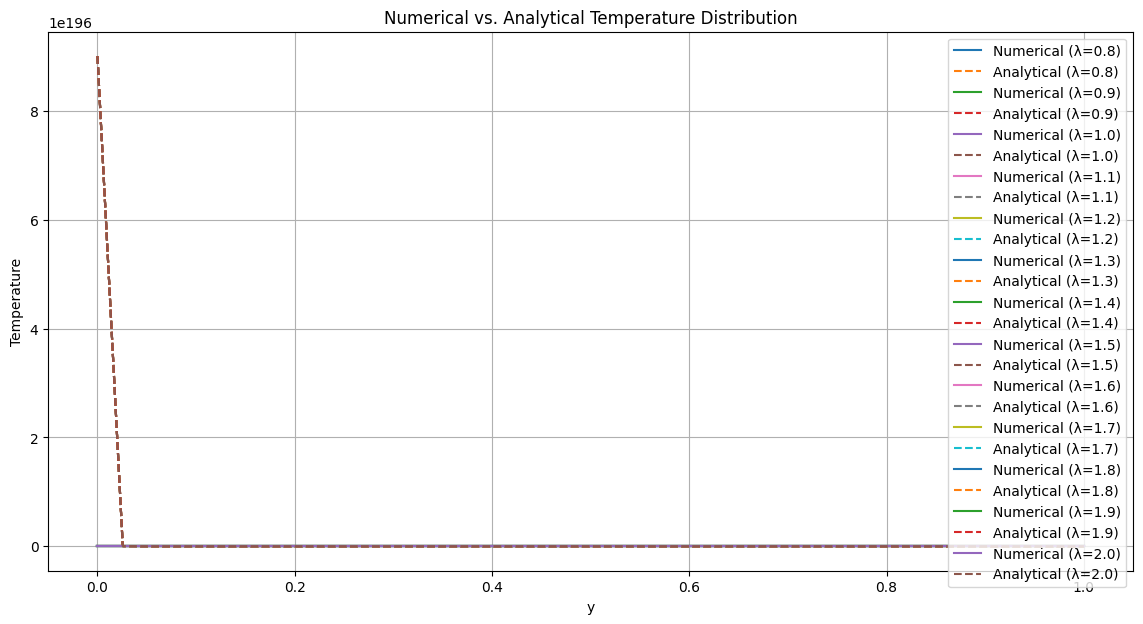

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
nx = 40
ny = 40
L = 1.0
T_L = 1.0
T_R = 1.0
T_1 = 1.0  # Updated to T_1
T_B = 1.0
max_n = 100
dx = L / (nx - 1)
dy = L / (ny - 1)
H = L  # Assuming H = L for simplicity
h = dy  # Height of each grid cell

def analytical_solution(x, y, L, T_1, max_n, H, h):
    T_analytical = np.zeros_like(x)
    for n in range(1, max_n + 1):
        term = (1 - (-1)**n) * np.sinh(n * np.pi * (H - y) / L) * np.sinh(n * np.pi * x / L) / (n * np.sinh(n * np.pi * h / L))
        T_analytical += term
    T_analytical *= (2 * T_1 / np.pi)
    return T_analytical

def run_tdmasolver(lam):
    # Initialize temperature field
    T = np.zeros((nx, ny))

    # Boundary conditions
    T[:, 0] = T_L
    T[:, -1] = T_R
    T[0, :] = T_B
    T[-1, :] = T_1

    # Coefficient arrays
    aw = np.zeros(nx)
    ap = np.zeros(nx)
    ae = np.zeros(nx)
    b = np.zeros(nx)

    # TDMA arrays
    P = np.zeros(nx)
    Q = np.zeros(nx)

    # Iterate until convergence
    for iteration in range(max_iter):
        T_old = T.copy()

        # TDMA implementation along a row (e.g., midline)
        j = ny // 2  # Mid-line

        for i in range(1, nx - 1):
            aw[i] = alpha / dx**2
            ae[i] = alpha / dx**2
            ap[i] = aw[i] + ae[i] + 2 * alpha / dy**2
            b[i] = (T[i, j-1] + T[i, j+1]) * alpha / dy**2

        # Forward elimination
        for i in range(1, nx - 1):
            P[i] = ae[i] / (ap[i] - aw[i] * P[i - 1])
            Q[i] = (aw[i] * Q[i - 1] + b[i]) / (ap[i] - aw[i] * P[i - 1])

        # Backward substitution
        for i in range(nx - 2, 0, -1):
            T[i, j] = P[i] * T[i + 1, j] + Q[i]

        # Under-relaxation
        T[:, j] = (1 - lam) * T_old[:, j] + lam * T[:, j]

        # Check convergence
        if np.linalg.norm(T - T_old, ord=np.inf) < tol:
            return T[:, j]  # Return temperature at midline

    return T[:, j]

# Define range of lambda values
lambda_values = np.arange(0.8, 2.1, 0.1)
midline_temperatures = []
analytical_temperatures = []

# Compute the analytical solution
y_mid = np.linspace(0, L, ny)
x_mid = np.full_like(y_mid, L / 2)
T_analytical_midline = analytical_solution(x_mid, y_mid, L, T_1, max_n, H, h)

# Run the TDMA solver for each lambda value
for lam in lambda_values:
    T_numerical_midline = run_tdmasolver(lam)
    midline_temperatures.append(T_numerical_midline)
    analytical_temperatures.append(T_analytical_midline)

# Convert lists to arrays for plotting
midline_temperatures = np.array(midline_temperatures)
analytical_temperatures = np.array(analytical_temperatures)

# Plotting
plt.figure(figsize=(14, 7))

# Plot numerical results vs. analytical results
for i, lam in enumerate(lambda_values):
    plt.plot(y_mid, midline_temperatures[i], label=f'Numerical (λ={lam:.1f})')
    plt.plot(y_mid, analytical_temperatures[i], '--', label=f'Analytical (λ={lam:.1f})')

plt.xlabel('y')
plt.ylabel('Temperature')
plt.title('Numerical vs. Analytical Temperature Distribution')
plt.legend()
plt.grid(True)
plt.show()
